In [4]:
from pylab import *
import matplotlib.pyplot as plt
import os

import pyAgrum as gum

bn = gum.BayesNet('WaterSprinklet')
print(bn)

BN{nodes: 0, arcs: 0, domainSize: 1, dim: 0, mem: 0o}


In [5]:
id_c=bn.add(gum.LabelizedVariable('c', 'cloudy?', 2))
print(id_c)

0


In [6]:
id_s, id_r, id_w = [bn.add(name, 2) for name in "srw"]
print(id_s, id_r, id_w)
print(bn)

1 2 3
BN{nodes: 4, arcs: 0, domainSize: 16, dim: 4, mem: 64o}


In [7]:
print(f"{bn.variable(id_s)=}")
print(f"{bn['s']=}")
print(f"{id_s=}")
print(f"{bn.idFromName('s')=}")
print(f"{bn.variable(id_s).name()=}")

bn.variable(id_s)=(pyAgrum.DiscreteVariable@0x5a7c90c8ea80) s:Range([0,1])
bn['s']=(pyAgrum.DiscreteVariable@0x5a7c90c8ea80) s:Range([0,1])
id_s=1
bn.idFromName('s')=1
bn.variable(id_s).name()='s'


In [8]:
bn.addArc("c","s")
for link in [(id_c,id_r),(id_s,id_w),(id_r,id_w)]:
    bn.addArc(*link)
print(bn)

BN{nodes: 4, arcs: 4, domainSize: 16, dim: 9, mem: 144o}


In [9]:
import pyAgrum.lib.notebook as gnb
bn

(pyAgrum.BayesNet<double>@0x5a7c90f32640) BN{nodes: 4, arcs: 4, domainSize: 16, dim: 9, mem: 144o}

In [10]:
bn=gum.fastBN("c->r->w<-s<-c")
bn

(pyAgrum.BayesNet<double>@0x5a7c90f62e20) BN{nodes: 4, arcs: 4, domainSize: 16, dim: 9, mem: 144o}

In [11]:
bn.cpt(id_c).fillWith([0.4,0.6])

(pyAgrum.Potential<double>@0x5a7c90028bc0) 
  c                |
0        |1        |
---------|---------|
 0.4000  | 0.6000  |

In [12]:
bn.cpt("c").fillWith([0.5,0.5])

(pyAgrum.Potential<double>@0x5a7c90028bc0) 
  c                |
0        |1        |
---------|---------|
 0.5000  | 0.5000  |

In [13]:
bn.cpt("s").names

('s', 'c')

In [14]:
bn.cpt("s")[:]=[[0.5,0.5],[0.9,0.1]]
print(bn.cpt("s")[1])

[0.9 0.1]


In [15]:
bn.cpt("s")[0,:]=0.5 # equivalent to [0.5,0.5]
bn.cpt("s")[1,:]=[0.9,0.1]
print(bn.cpt("w").names)
bn.cpt("w")

('w', 'r', 's')


(pyAgrum.Potential<double>@0x5a7c90b23b10) 
             ||  w                |
r     |s     ||0        |1        |
------|------||---------|---------|
0     |0     || 0.5777  | 0.4223  |
1     |0     || 0.9904  | 0.0096  |
0     |1     || 0.9032  | 0.0968  |
1     |1     || 0.6247  | 0.3753  |

In [16]:
bn.cpt("w")[{'r': 0, 's': 0}] = [1, 0]
bn.cpt("w")[{'r': 0, 's': 1}] = [0.1, 0.9]
bn.cpt("w")[{'r': 1, 's': 0}] = [0.1, 0.9]
bn.cpt("w")[{'r': 1, 's': 1}] = [0.01, 0.99]
bn.cpt("w")

(pyAgrum.Potential<double>@0x5a7c90b23b10) 
             ||  w                |
r     |s     ||0        |1        |
------|------||---------|---------|
0     |0     || 1.0000  | 0.0000  |
1     |0     || 0.1000  | 0.9000  |
0     |1     || 0.1000  | 0.9000  |
1     |1     || 0.0100  | 0.9900  |

In [17]:
bn.cpt("r")[{'c':0}]=[0.8,0.2]
bn.cpt("r")[{'c':1}]=[0.2,0.8]

In [18]:
gum.saveBN(bn,"out/WaterSprinkler.bif")

In [19]:
with open("out/WaterSprinkler.bif","r") as out:
    print(out.read())

network "unnamedBN" {
// written by aGrUM 1.14.1
}

variable c {
   type discrete[2] {0, 1};
}

variable r {
   type discrete[2] {0, 1};
}

variable w {
   type discrete[2] {0, 1};
}

variable s {
   type discrete[2] {0, 1};
}

probability (c) {
   table 0.5 0.5;
}
probability (r | c) {
   (0) 0.8 0.2;
   (1) 0.2 0.8;
}
probability (w | r, s) {
   (0, 0) 1 0;
   (1, 0) 0.1 0.9;
   (0, 1) 0.1 0.9;
   (1, 1) 0.01 0.99;
}
probability (s | c) {
   (0) 0.5 0.5;
   (1) 0.9 0.1;
}




In [20]:
bn2=gum.loadBN("out/WaterSprinkler.bif")


In [21]:
gum.saveBN(bn,"out/WaterSprinkler.net")
with open("out/WaterSprinkler.net","r") as out:
    print(out.read())
bn3=gum.loadBN("out/WaterSprinkler.net")


net {
  name = unnamedBN;
  software = "aGrUM 1.14.1";
  node_size = (50 50);
}

node c {
   states = (0 1 );
   label = "c";
   ID = "c";
}

node r {
   states = (0 1 );
   label = "r";
   ID = "r";
}

node w {
   states = (0 1 );
   label = "w";
   ID = "w";
}

node s {
   states = (0 1 );
   label = "s";
   ID = "s";
}

potential (c) {
   data = (  0.5 0.5);
}

potential ( r | c   ) {
   data = 
   ((   0.8   0.2)   % c=0   
   (   0.2   0.8));   % c=1   
}

potential ( w | r   s   ) {
   data = 
   (((   1   0)   % s=0   r=0   
   (   0.1   0.9))   % s=1   r=0   
   ((   0.1   0.9)   % s=0   r=1   
   (   0.01   0.99)));   % s=1   r=1   
}

potential ( s | c   ) {
   data = 
   ((   0.5   0.5)   % c=0   
   (   0.9   0.1));   % c=1   
}





In [22]:
ie=gum.LazyPropagation(bn)
ie.makeInference()
print (ie.posterior("w"))


  w                |
0        |1        |
---------|---------|
 0.3529  | 0.6471  |



In [23]:
ie.setEvidence({'s': 0, 'c': 1})
ie.makeInference()
ie.posterior("w")


(pyAgrum.Potential<double>@0x5a7c90b05c60) 
  w                |
0        |1        |
---------|---------|
 0.2800  | 0.7200  |

In [24]:
ie.setEvidence({'s': [0.5, 1], 'c': [1, 0]})
ie.makeInference()
ie.posterior("w") # using gnb's feature

(pyAgrum.Potential<double>@0x5a7c90f6a290) 
  w                |
0        |1        |
---------|---------|
 0.3280  | 0.6720  |

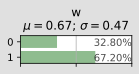

In [25]:
gnb.showProba(ie.posterior("w"))

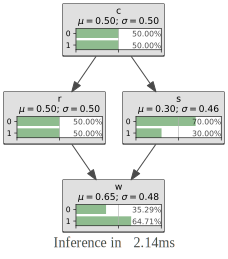

In [26]:
gnb.showInference(bn,evs={})

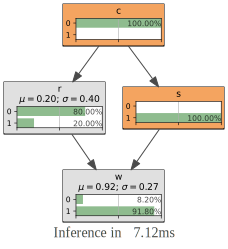

In [27]:
gnb.showInference(bn,evs={'s':1,'c':0})

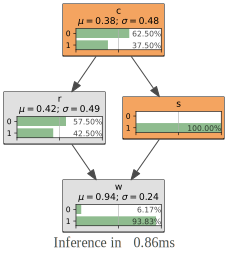

In [28]:
gnb.showInference(bn,evs={'s':1,'c':[0.3,0.9]})

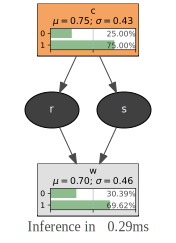

In [29]:
gnb.showInference(bn,evs={'c':[0.3,0.9]},targets={'c','w'})

In [30]:
bn = gum.fastBN("A->B<-C->D->E<-F<-A;C->G<-H<-I->J")
bn

(pyAgrum.BayesNet<double>@0x5a7c9104a420) BN{nodes: 10, arcs: 10, domainSize: 1024, dim: 23, mem: 368o}